In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [46]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [48]:
iris['label']=iris.species.map({'setosa':1, 'versicolor':2 , 'virginica':
                                3})

In [49]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [50]:
iris.shape



(150, 6)

In [51]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   label         150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<Axes: ylabel='count'>

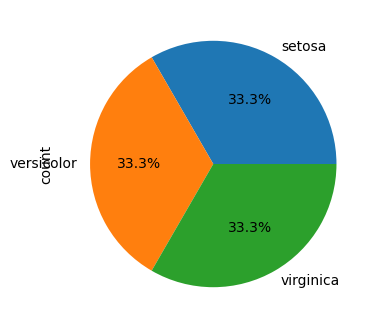

In [52]:
iris.species.value_counts().plot(kind='pie' , autopct="%.1f%%",figsize=(4,4))

In [53]:
iris.species.value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

C:\Users\YOGA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


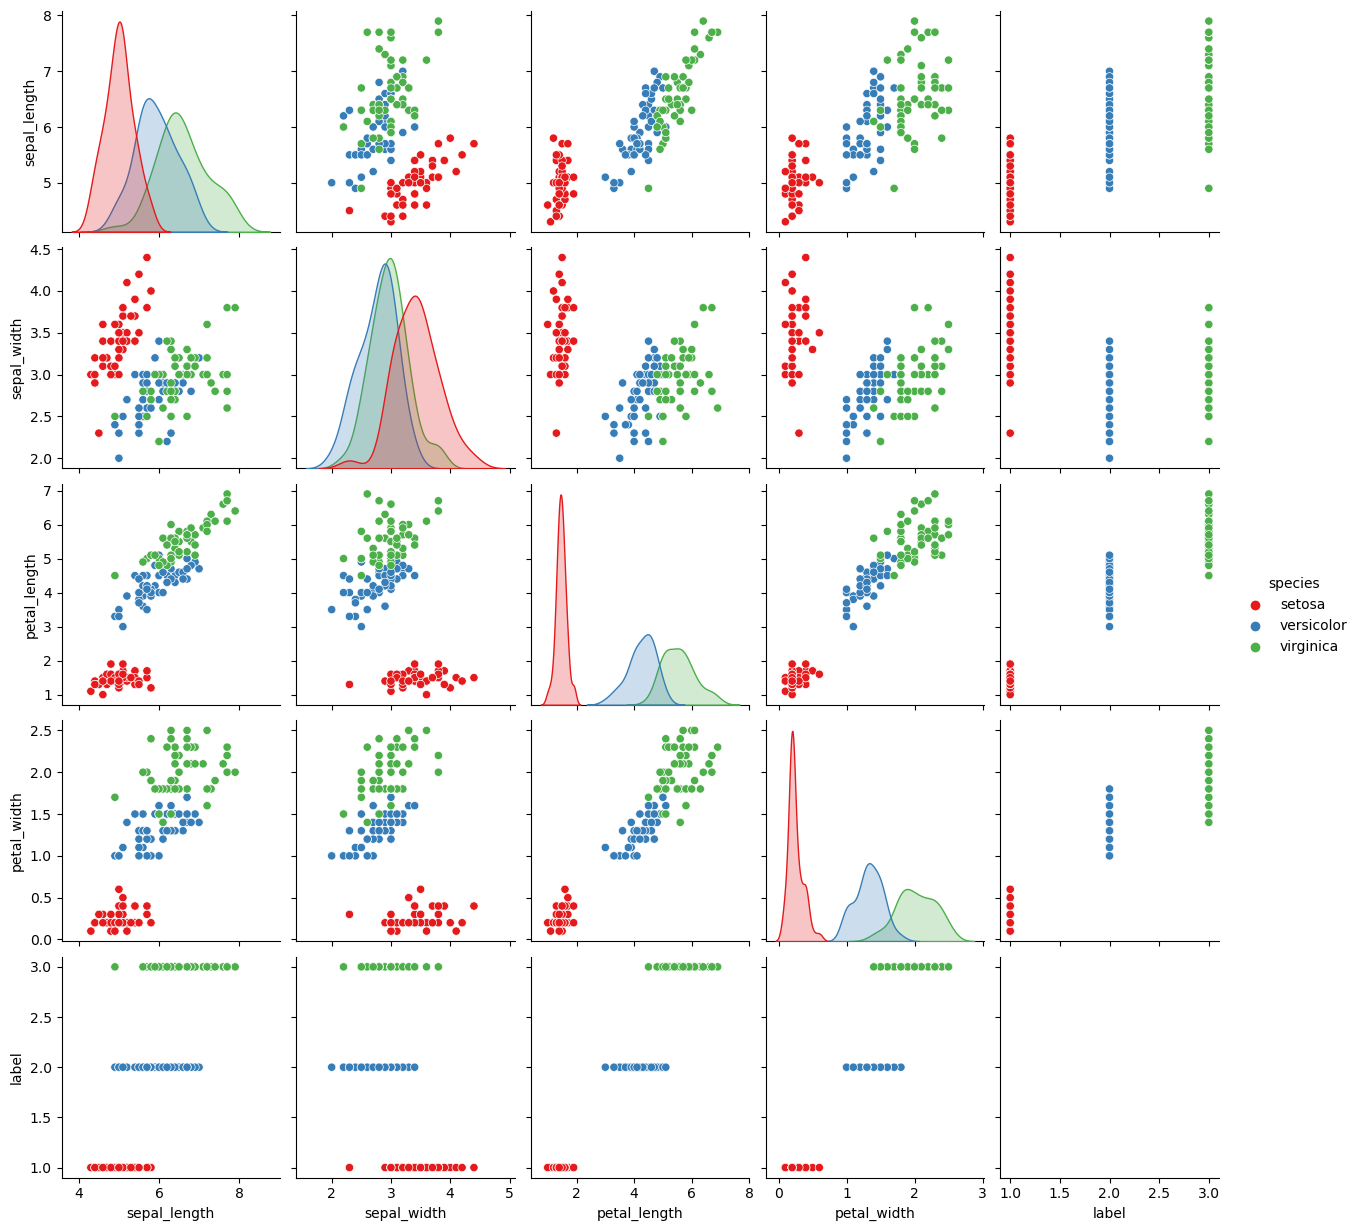

In [54]:
sns.pairplot(iris,hue='species',palette='Set1')

In [55]:
from sklearn.model_selection import train_test_split
X=iris.drop(['species','label'],axis=1)
Y=iris['label']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)


In [57]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

result=confusion_matrix(Y_test,y_pred)
print("Confusion matrix")
print(result)

result1= classification_report(Y_test,y_pred)
print("Classification report")
print(result1)

result2=accuracy_score(Y_test,y_pred)
print("Accuracy_score")
print(result2)

Confusion matrix
[[5 0 0]
 [0 4 0]
 [0 1 5]]
Classification report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.80      1.00      0.89         4
           3       1.00      0.83      0.91         6

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.95      0.93      0.93        15

Accuracy_score
0.9333333333333333


In [58]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y_test,y_pred)

array([[[10,  0],
        [ 0,  5]],

       [[10,  1],
        [ 0,  4]],

       [[ 9,  0],
        [ 1,  5]]], dtype=int64)

Text(0, 0.5, 'Accuracy')

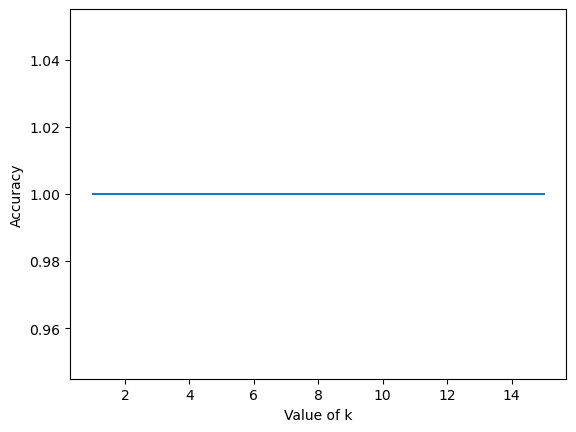

In [59]:
from sklearn import metrics
k_range=(1,15)
score={}
score_list=[]
for k in k_range:
    classifier =  KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,Y_train)
    y_pred=classifier.predict(X_test)
    score[k] = metrics.accuracy_score(Y_test,y_pred)
    score_list.append(metrics.accuracy_score(Y_test,y_pred))

%matplotlib inline
plt.plot(k_range,score_list)
plt.xlabel("Value of k")
plt.ylabel("Accuracy")